# Reading and modifying data

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
%run data_pipeline.ipynb

########## Data pipeline ##########

Preparing CMU data
379 movies shared both name and release year, dropping
314 movies had actors with the same name, dropping

Merging Oscar dataset, after merge:
Number of different Oscar nominated movies in dataset: 952 in total 63968 different movies
Number of different Oscar nominated actors in dataset: 801 in total 134907 different actors
Number of Oscar nominated rows: 1443

Merging IMDb dataset, after merge:
Number of movies with ratings: 36760
Oscar nominated movies with rating: 939
Number of rows in data before cleaning:  443504
Number of rows in data after cleaning:  23819

FINAL STATE OF DATA
Number of rows:  23819
Number of different Oscar nominated movies in dataset: 394 in total 5989 different movies
Number of different Oscar nominated actors in dataset: 284 in total 2962 different actors
Number of Oscar nominated rows: 519
Processing done, dataset written to cache/data.csv


In [5]:
# Read data
df = pd.read_csv('cache/data.csv', sep=',', index_col=0)
unclean_df = pd.read_csv('cache/unclean_data.csv', sep=',', index_col=0)

#Fix apostrophes in countries column
df['countries'] = df['countries'].apply(lambda row: row.replace("'", '"')).apply(json.loads)
unclean_df['countries'] = unclean_df['countries'].apply(lambda row: row.replace("'", '"')).apply(json.loads)

#Extract all countries associated to a given movie
df = df.explode(column='countries').rename(columns={'countries':'country'}).reset_index()
unclean_df = unclean_df.explode(column='countries').rename(columns={'countries':'country'}).reset_index()

# Effect on distributions
Plotting the distributions of variables before and after data cleaning was conducted

In [7]:
nominated_df = df[df['oscar_nominated'] == True]
nominated_unclean_df = unclean_df[unclean_df['oscar_nominated'] == True]

## Country

In [29]:
#Only count USA and UK as separate, as they have more movies then other countries combined
nominated_countries = nominated_df['country'].apply(lambda country: country if country in ['United States of America', 'United Kingdom'] else 'Others')
nominated_countries_unclean = nominated_unclean_df['country'].apply(lambda country: country if country in ['United States of America', 'United Kingdom'] else 'Others')

all_movies_countries = df['country'].apply(lambda country: country if country in ['United States of America', 'United Kingdom'] else 'Others')
all_movies_countries_unclean = unclean_df['country'].apply(lambda country: country if country in ['United States of America', 'United Kingdom'] else 'Others')

In [37]:
#Get counts of the countries
nominated_df_counts = nominated_countries.value_counts()
nominated_unclean_df_counts = nominated_countries_unclean.value_counts()

all_movies_counts = all_movies_countries.value_counts()
all_movies_counts_unclean = all_movies_countries_unclean.value_counts()

In [74]:
#Combine clean and unclean data for plotting (for both nominated and not-nominated data
merged_nominated = pd.concat([nominated_unclean_df_counts, nominated_df_counts], axis=1).fillna(0)
merged_nominated.columns = ["unclean_count", "clean_count"]
merged_nominated = merged_nominated.rename(index={'United States of America': 'USA', 'United Kingdom' : 'UK'})
merged_nominated = merged_nominated.sort_index()

merged_all = pd.concat([all_movies_counts_unclean, all_movies_counts], axis=1).fillna(0)
merged_all.columns = ["unclean_count", "clean_count"]
merged_all = merged_all.rename(index={'United States of America': 'USA', 'United Kingdom' : 'UK'})
merged_all = merged_all.sort_index()

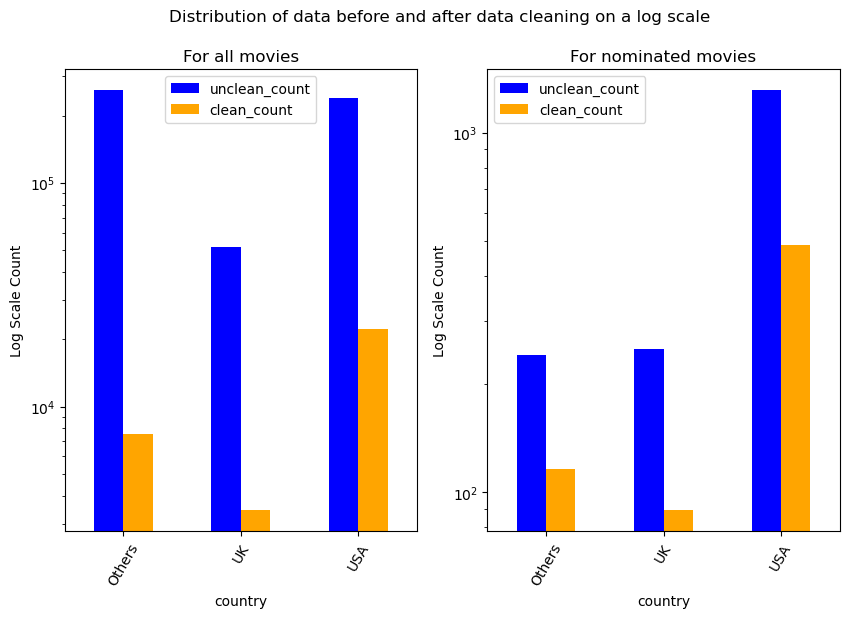

In [84]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Distribution of data before and after data cleaning on a log scale")

merged_all.plot(kind="bar", figsize=(10, 6), color=["blue", "orange"], ax = axs[0])
axs[0].set_title("For all movies")
axs[0].tick_params(axis="x", rotation=60)
axs[0].set_yscale("log")
axs[0].set_ylabel("Log Scale Count")

merged_nominated.plot(kind="bar", figsize=(10, 6), color=["blue", "orange"], ax = axs[1])
axs[1].set_title("For nominated movies")
axs[1].tick_params(axis="x", rotation=60)
axs[1].set_yscale("log")
axs[1].set_ylabel("Log Scale Count")

plt.show()

As seen in this plot, cleaning the data has a pretty significant effect on the distribution of data, in terms of the presence of nominated movies. Before cleaning, the number of movies from other countries was comparable to the number of movies from USA. After cleaning this was no longer true.

Looking at the nominated movies, the number of nominated movies from other countries or the UK never compared to the number of nominated movies from the US.

In conclusion, this means that the data cleaning process targets more the group of movies that are unnominated and from countries other than the US.

**Note** for others, if you have made it this far congratulations, it is also interesting to check these plots without the axs[1].set_yscale("log"), as then the change is even more dramatic. Just that the number of "others" remaining after is so small that the plot is less readable